In [76]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [77]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [78]:
!kaggle datasets download -d teertha/personal-loan-modeling

personal-loan-modeling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [79]:
!unzip '*.zip'

Archive:  personal-loan-modeling.zip
replace Bank_Personal_Loan_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [80]:
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [82]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [83]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [84]:
df['Personal Loan'] = df['Personal Loan'].map({0:'No', 1:'Yes'})

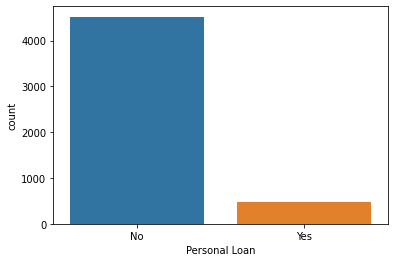

In [60]:
sns.countplot(x ='Personal Loan', data=df)

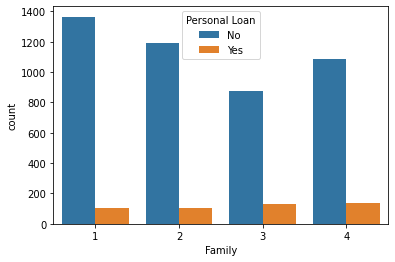

In [61]:
sns.countplot(x ='Family', data=df, hue='Personal Loan')

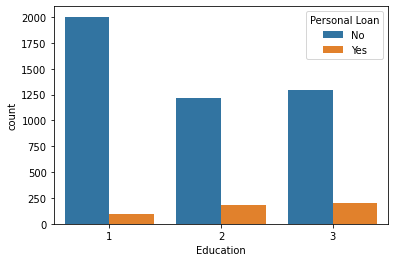

In [13]:
sns.countplot(x ='Education', data=df, hue='Personal Loan')

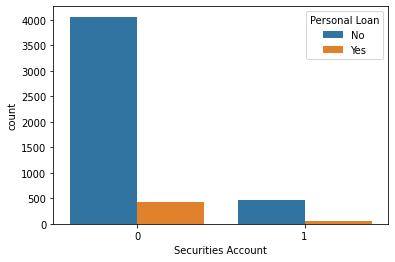

In [14]:
sns.countplot(x ='Securities Account', data=df, hue='Personal Loan')

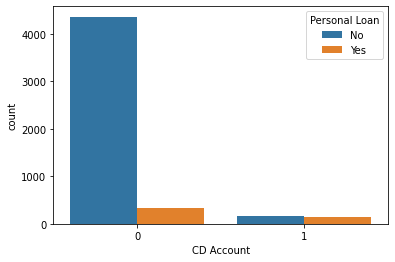

In [16]:
sns.countplot(x ='CD Account', data=df, hue='Personal Loan')

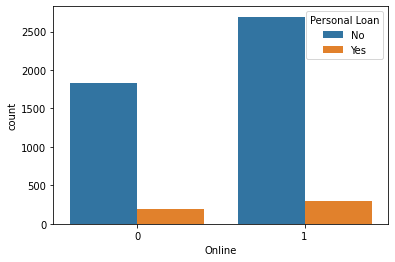

In [18]:
sns.countplot(x ='Online', data=df, hue='Personal Loan')

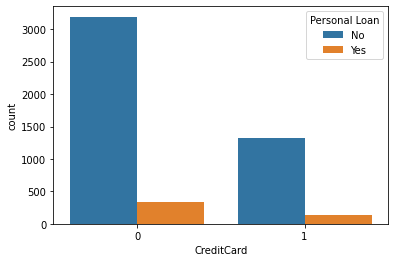

In [19]:
sns.countplot(x ='CreditCard', data=df, hue='Personal Loan')

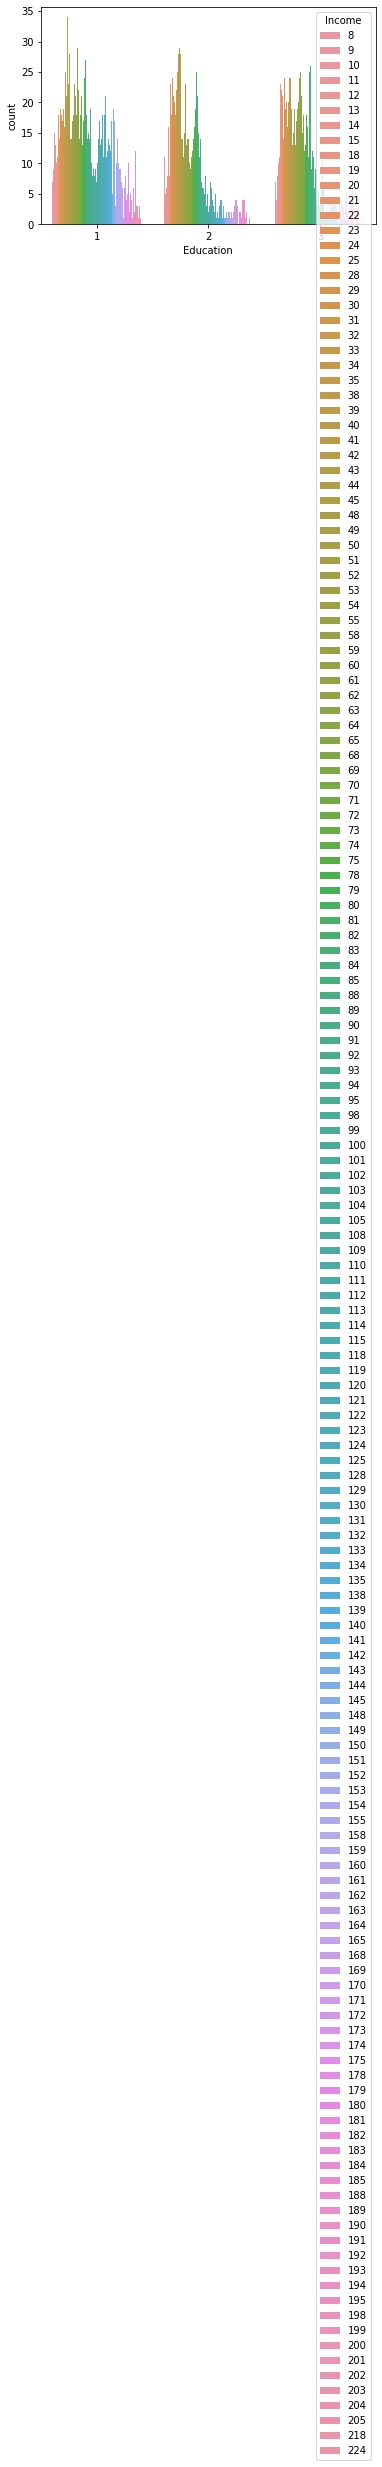

In [20]:
sns.countplot(x ='Education', data=df, hue='Income')

In [62]:
df.groupby(['Education']).mean('Income')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
Education,,,,,,,,,,,,
1,2473.121660,44.963740,20.065363,85.586355,93147.202767,2.236164,2.260830,61.627385,0.106870,0.056298,0.598760,0.302004
2,2489.587313,45.039914,19.770492,64.313614,93278.676408,2.652174,1.685089,51.319316,0.106914,0.062723,0.612972,0.285103
3,2548.931379,46.140573,20.471686,66.122585,93041.968688,2.381079,1.723391,54.178548,0.098601,0.063957,0.578947,0.291139


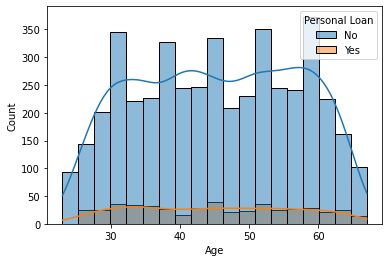

In [22]:
sns.histplot(x="Age", data=df, hue='Personal Loan', kde='True')

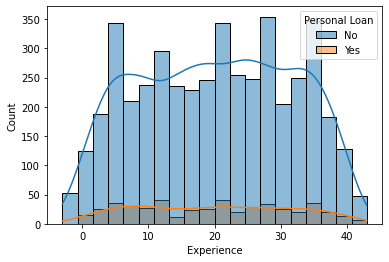

In [24]:
sns.histplot(x="Experience", data=df, hue='Personal Loan', kde='True')

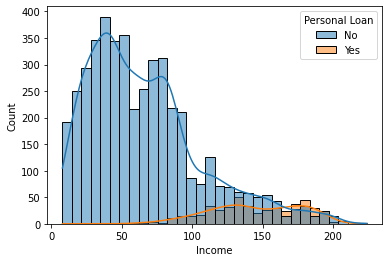

In [25]:
sns.histplot(x="Income", data=df, hue='Personal Loan', kde='True')

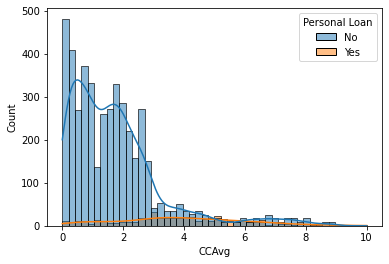

In [26]:
sns.histplot(x="CCAvg", data=df, hue='Personal Loan', kde='True')

In [85]:
print(df['CCAvg'].quantile(0.95))
print(df['CCAvg'].quantile(0.05))

6.0
0.1


In [86]:
p1 = df['CCAvg'].quantile(0.95)
p2 = df['CCAvg'].quantile(0.1)

In [87]:
df = df[(p1>df['CCAvg']) & (df['CCAvg']>p2)]

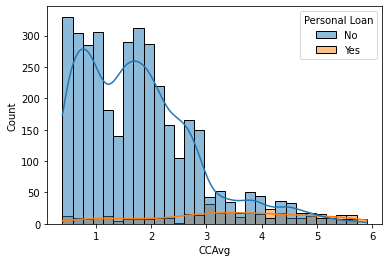

In [88]:
sns.histplot(x="CCAvg", data=df, hue='Personal Loan', kde='True')

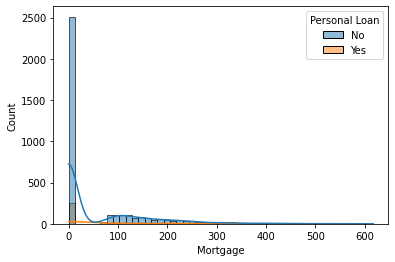

In [89]:
sns.histplot(x="Mortgage", data=df, hue='Personal Loan', kde='True')

In [90]:
m1 = df['Mortgage'].quantile(0.95)

In [91]:
df = df[(m1>df['Mortgage'])]

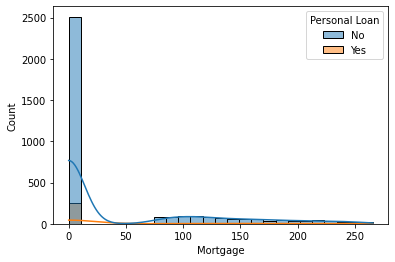

In [92]:
sns.histplot(x="Mortgage", data=df, hue='Personal Loan', kde='True')

In [93]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

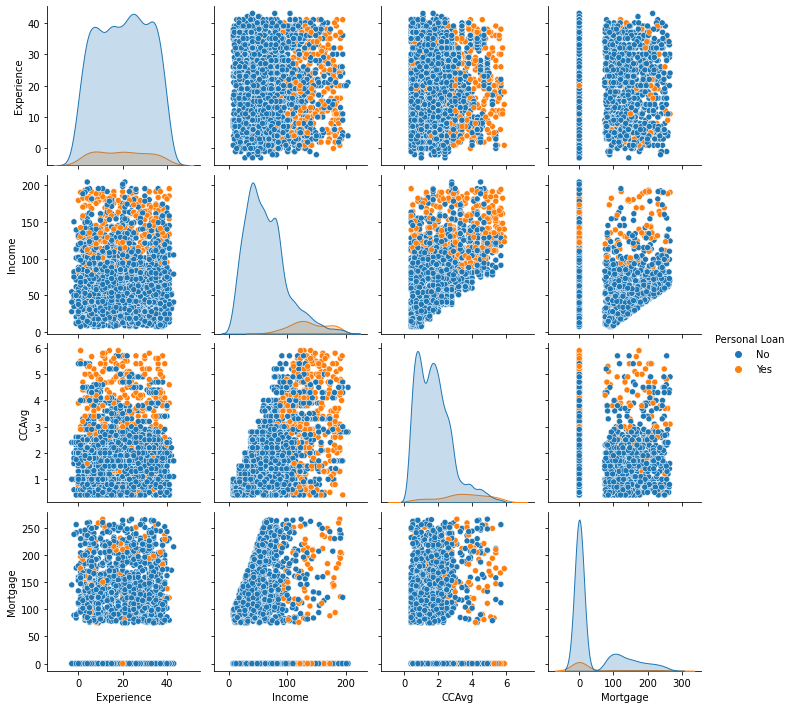

In [36]:
sns.pairplot(df, x_vars=['Experience','Income','CCAvg','Mortgage'],
             y_vars = ['Experience','Income','CCAvg','Mortgage'],hue='Personal Loan')

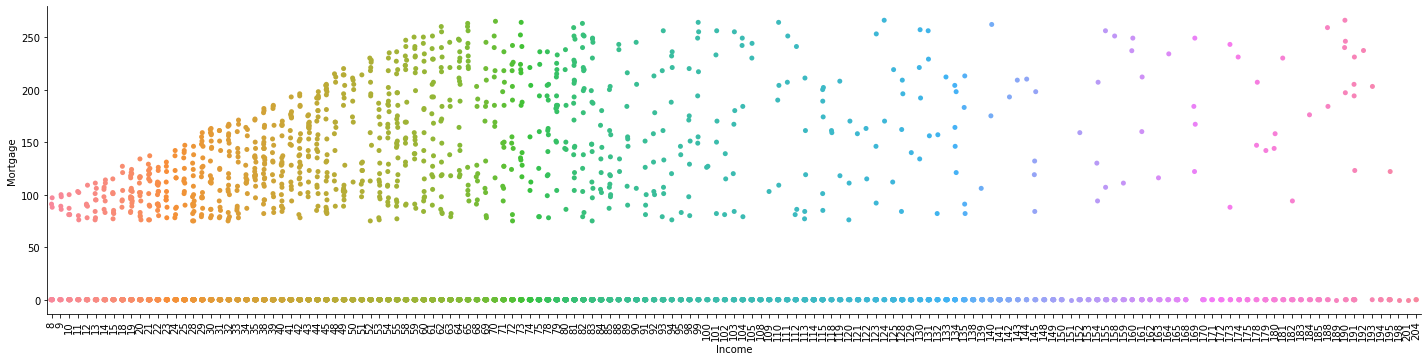

In [38]:
sns.catplot(x='Income', y='Mortgage', data=df, aspect=4)
plt.xticks(rotation=90)
plt.show()

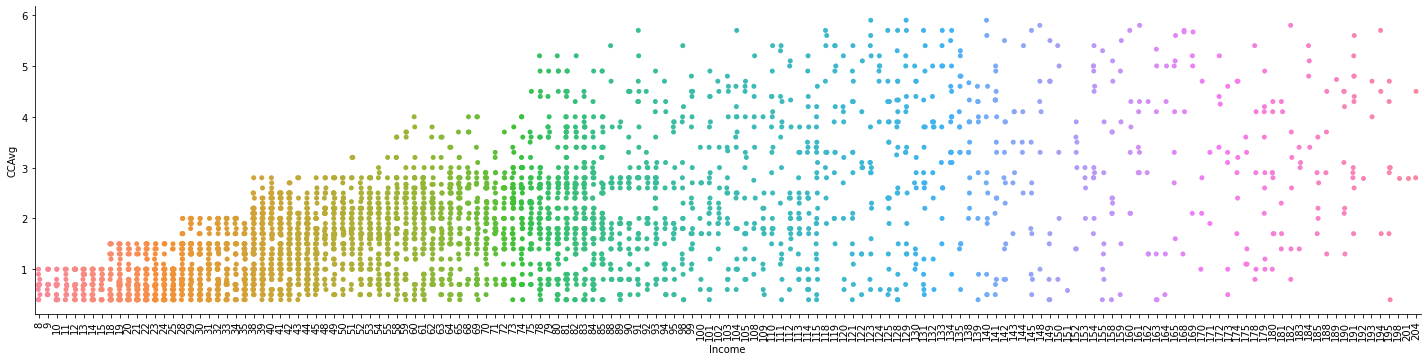

In [39]:
sns.catplot(x='Income', y='CCAvg', data=df, aspect=4)
plt.xticks(rotation=90)
plt.show()

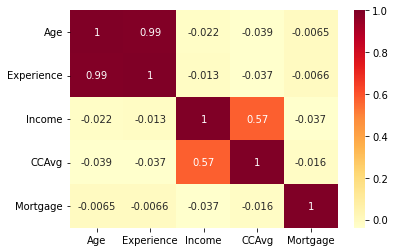

In [40]:
sns.heatmap(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].corr(),
            annot=True, cmap='YlOrRd')

In [94]:
df['Personal Loan'] = df['Personal Loan'].map({'No':0, 'Yes':1})

In [95]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [96]:
df.drop(['ID', 'ZIP Code','Experience'], axis=1, inplace=True)

In [97]:
df

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4994,64,75,3,2.0,3,0,0,0,0,1,0
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [99]:
X_cat =df['Education']
X_cat = pd.get_dummies(X_cat, prefix='Education')
X_cat.head()

,Education_1,Education_2,Education_3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_num = df[['Age','Income', 'Family','CCAvg', 'Mortgage']]
x_scaled = scaler.fit_transform(x_num)
x_scaled = pd.DataFrame(x_scaled, index=x_num.index, columns=x_num.columns)
x_scaled

,Age,Income,Family,CCAvg,Mortgage
0,-1.770838,-0.508060,1.329533,-0.242033,-0.568678
1,-0.038496,-0.879253,0.466507,-0.327619,-0.568678
2,-0.558199,-1.448415,-1.259546,-0.755548,-0.568678
3,-0.904667,0.753997,-1.259546,0.699411,-0.568678
4,-0.904667,-0.607044,1.329533,-0.755548,-0.568678
...,...,...,...,...,...
4994,1.607228,0.135342,0.466507,0.100310,-0.568678
4995,-1.424370,-0.730775,-1.259546,0.014724,-0.568678
4996,-1.337753,-1.349430,1.329533,-1.269063,0.624091
4998,1.693845,-0.508060,0.466507,-1.183478,-0.568678


In [107]:
from sklearn.model_selection import train_test_split

cat_lst = ['Securities Account' , 'CD Account', 'Online', 'CreditCard']
X =pd.concat([x_scaled,X_cat,df[cat_lst]],axis=1)
y = df['Personal Loan']

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

In [110]:
X_train.shape, X_test.shape

((2544, 12), (1254, 12))

In [112]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [113]:
from sklearn import metrics
pred = model_lr.predict(X_test)
lr_matrix = metrics.confusion_matrix(y_test, pred)
lr_matrix

array([[1135,   11],
       [  39,   69]])

In [116]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.960127591706539

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1146
           1       0.86      0.64      0.73       108

    accuracy                           0.96      1254
   macro avg       0.91      0.81      0.86      1254
weighted avg       0.96      0.96      0.96      1254



In [118]:
from sklearn import svm

In [119]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [120]:
svm_pred = svm.predict(X_test)

In [121]:
svm_matrix = metrics.confusion_matrix(y_test, svm_pred)
svm_matrix

array([[1143,    3],
       [  27,   81]])

In [122]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1146
           1       0.96      0.75      0.84       108

    accuracy                           0.98      1254
   macro avg       0.97      0.87      0.92      1254
weighted avg       0.98      0.98      0.97      1254



In [125]:
from sklearn.neighbors import KNeighborsClassifier

k_lst = list(range(1,12,2))
for k in k_lst:
  print(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  knn_matrix = metrics.confusion_matrix(y_test, pred)
  print(knn_matrix)
  print(classification_report(y_test,pred))

1
[[1140    6]
 [  38   70]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1146
           1       0.92      0.65      0.76       108

    accuracy                           0.96      1254
   macro avg       0.94      0.82      0.87      1254
weighted avg       0.96      0.96      0.96      1254

3
[[1143    3]
 [  40   68]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1146
           1       0.96      0.63      0.76       108

    accuracy                           0.97      1254
   macro avg       0.96      0.81      0.87      1254
weighted avg       0.97      0.97      0.96      1254

5
[[1145    1]
 [  46   62]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1146
           1       0.98      0.57      0.73       108

    accuracy                           0.96      1254
   macro avg       0.97      0.79      0.

In [126]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
dt_clf_matrix = metrics.confusion_matrix(y_test,pred)
print(dt_clf_matrix)
print(classification_report(y_test,pred))


[[1137    9]
 [  16   92]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1146
           1       0.91      0.85      0.88       108

    accuracy                           0.98      1254
   macro avg       0.95      0.92      0.93      1254
weighted avg       0.98      0.98      0.98      1254



[0.029 0.451 0.129 0.106 0.011 0.245 0.005 0.    0.    0.016 0.003 0.005]
Age 0.02923642278515429
Income 0.45102269349037466
Family 0.12864728518030832
CCAvg 0.10621557080415915
Mortgage 0.01127034670166703
Education_1 0.2447041598008129
Education_2 0.0045947515799876935
Education_3 0.0
Securities Account 0.0
CD Account 0.016199729293339574
Online 0.0034753030132270517
CreditCard 0.004633737350969402


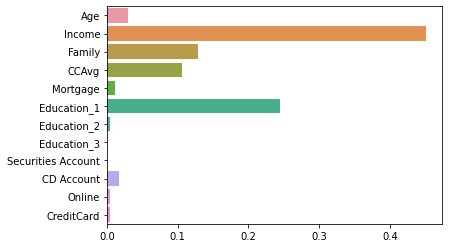

In [129]:
print(np.round(dt_clf.feature_importances_,3))

for name, value in zip(X.columns, dt_clf.feature_importances_):
  print(name,value)

sns.barplot(x=dt_clf.feature_importances_, y=X.columns)

In [130]:
from re import S
from sklearn.model_selection import GridSearchCV
import pandas as pd
dtree = DecisionTreeClassifier()
parameters = {'max_depth': [1,2,3,4.5], 'min_samples_split': [2,3,4,5,6]}
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score', 'rank_test_score','split0_test_score',
           'split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.917846,16,0.918632,0.917453,0.917453
1,"{'max_depth': 1, 'min_samples_split': 3}",0.917846,16,0.918632,0.917453,0.917453
2,"{'max_depth': 1, 'min_samples_split': 4}",0.917846,16,0.918632,0.917453,0.917453
3,"{'max_depth': 1, 'min_samples_split': 5}",0.917846,16,0.918632,0.917453,0.917453
4,"{'max_depth': 1, 'min_samples_split': 6}",0.917846,16,0.918632,0.917453,0.917453
5,"{'max_depth': 2, 'min_samples_split': 2}",0.961085,11,0.962264,0.955189,0.965802
6,"{'max_depth': 2, 'min_samples_split': 3}",0.961085,11,0.962264,0.955189,0.965802
7,"{'max_depth': 2, 'min_samples_split': 4}",0.961085,11,0.962264,0.955189,0.965802
8,"{'max_depth': 2, 'min_samples_split': 5}",0.961085,11,0.962264,0.955189,0.965802
9,"{'max_depth': 2, 'min_samples_split': 6}",0.961085,11,0.962264,0.955189,0.965802


In [131]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSerchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4.5, 'min_samples_split': 3}
GridSerchCV 최고 정확도: 0.9792


In [135]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
estimator_matrix = metrics.confusion_matrix(y_test, pred)
print(classification_report(y_test,pred))
print(estimator_matrix)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1146
           1       0.93      0.84      0.88       108

    accuracy                           0.98      1254
   macro avg       0.96      0.92      0.94      1254
weighted avg       0.98      0.98      0.98      1254

[[1139    7]
 [  17   91]]
테스트 데이터 세트 정확도: 0.9809


[0.    0.503 0.125 0.073 0.    0.284 0.    0.    0.    0.015 0.    0.   ]
Age 0.0
Income 0.5030501509054981
Family 0.12463929075058039
CCAvg 0.07318511801437959
Mortgage 0.0
Education_1 0.28433998207129335
Education_2 0.0
Education_3 0.0
Securities Account 0.0
CD Account 0.014785458258248495
Online 0.0
CreditCard 0.0


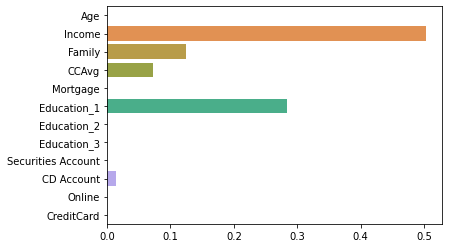

In [136]:
print(np.round(estimator.feature_importances_,3))

for name, value in zip(X.columns, estimator.feature_importances_):
  print(name,value)

sns.barplot(x=estimator.feature_importances_, y=X.columns)

In [138]:
test_pred = np.zeros(len(X_test))
test_matrix = metrics.confusion_matrix(y_test, test_pred)
print(test_matrix)
print(classification_report(y_test, test_pred))

[[1146    0]
 [ 108    0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1146
           1       0.00      0.00      0.00       108

    accuracy                           0.91      1254
   macro avg       0.46      0.50      0.48      1254
weighted avg       0.84      0.91      0.87      1254



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
